In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from google.colab import drive
drive.mount('/content/drive/')
import json
with open('/content/drive/MyDrive/DATA/tsdl.JSON', 'r', encoding='cp1252') as f:
    data = json.load(f)

Mounted at /content/drive/


Database correction

In [ ]:
def replace_nan_last(array):
    #array=array.reshape(1,len(array))
    if (array[0]=='NA'):
        array[0]=0
    for i in range(1,len(array)):
        if (array[i]=='NA'):
            array[i] = array[i-1]
    return array

Stationnarity Test

In [10]:
def is_stationary_adfuller(series):
    # Test de stationnarité avec le test Dickey-Fuller Augmenté
    result = adfuller(series)
    p_value = result[1]
    alpha = 0.05  # Niveau de signification

    if p_value <= alpha:
        return True  # La série est stationnaire
    else:
        return False  # La série est non-stationnaire


def stationarity_score(series):
    # Test de stationnarité avec le test Dickey-Fuller Augmenté
    result = adfuller(series)
    p_value = result[1]

    # Inverser la p-value pour obtenir le score de stationnarité
    stationarity_score = 1 - p_value

    return stationarity_score

Stochasticity Test - Recurrence Matrix

In [ ]:
# Function that calculates recurrences plots
def recurrence_matrix(L, eps):
    N = len(L)
    R = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            if abs(L[i] - L[j]) < eps:
                R[i, j] = 1
    return R

# Function that gives the proportion of 1 in the matrix, this function is used to choose eps
def percentage(matrix):
  count = 0
  N = matrix.shape[0]
  for i in range(N):
    for j in range(N):
      if i!=j and matrix[i, j] == 1:
        count +=1
  return(count*100/N**2)


# Function used for count_diagonal_points, this function allows to know whether a point belongs to a diagonal or not
def is_surrounded_by_ones(matrix, i, j):
    n_rows, n_cols = matrix.shape

    # Coordonnées des points adjacents en diagonale
    diagonals = [(i + 1, j + 1), (i - 1, j - 1), (i - 1, j + 1), (i + 1, j - 1)]

    # Vérification si les points adjacents en diagonale existent et contiennent des 1
    for di, dj in diagonals:
        if 0 <= di < n_rows and 0 <= dj < n_cols and matrix[di, dj] == 1:
            return True

    return False


# Function that counts the points that make up diagonals
def count_diagonal_points(matrix):
    count = 0
    N = matrix.shape[0]
    # On compte tous les 1
    for i in range(0,N):
      for j in range(0,N):
        if matrix[i, j] == 1 and i!=j : # On ne compte pas les points de la diagonale
          if  is_surrounded_by_ones(matrix, i, j) == False :  # On ne compte pas les points isolés (qui n'appartiennent pas à une diagonale)
            count = count
          else :
            count = count + 1
    # On enlève les points isolés (qui n'appartiennent pas à une diagonale)
    return count

# Function that counts the number of 1 in the matrix
def count_points(matrix):
    count = 0
    N = matrix.shape[0]
    for i in range(N):
      for j in range(N):
        if i!=j and matrix[i, j] == 1:
          count +=1
    return(count)

# Function that calculates DET value of a recurrence plot
def det(R):
    num = count_diagonal_points(R)
    den = count_points(R)
    if den != 0 :
      return(num/den)
    else :
      return("DET cannot be calculated")


# Function to choose eps
def choose_eps(L, percent): #percent = 0.1 par exemple
    # Calculer la distance moyenne entre tous les points de la série temporelle
    distances = []
    for i in range(len(L)):
        for j in range(i+1, len(L)):
            distances.append(abs(L[i] - L[j]))
    mean_distance = np.mean(distances)

    # Choisir eps comme un pourcentage de la distance moyenne
    eps = percent * mean_distance

    return eps


Example of stochasticity test on the TSDL

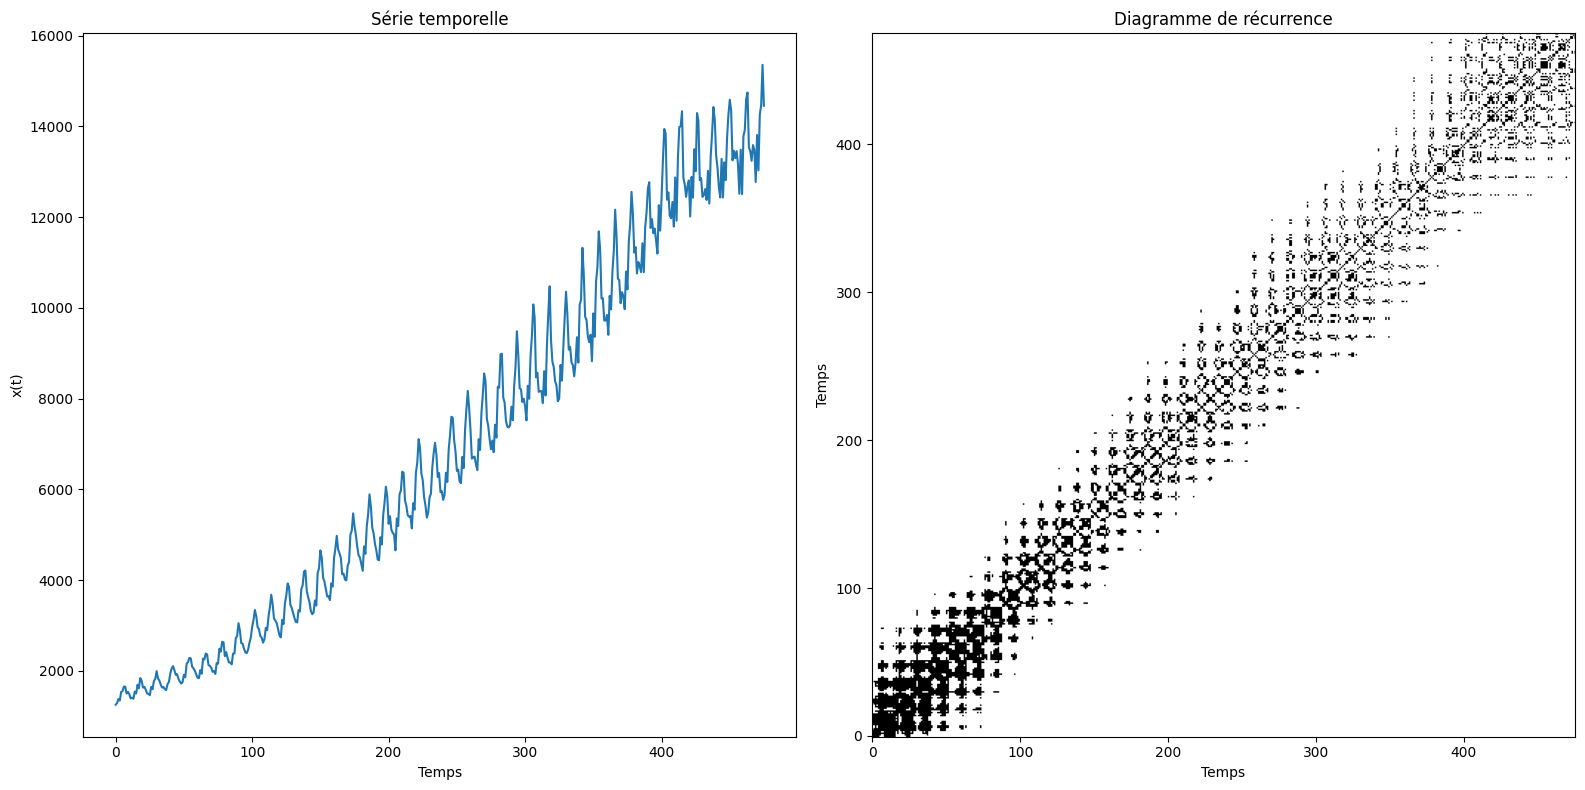

DET = 0.863103953147877
Pourcentage = 4.823105712873384


In [ ]:
# Example from TSDL
ind  = 121   ### YOU CAN CHANGE THIS VALUE
L =  data[ind]['values']
L = np.array(L)
L = replace_nan_last(L)
N = len(L)


eps = choose_eps(L, 0.1)

R = recurrence_matrix(L, eps)

p  = pourcentage(R)

# Fit eps as a function of p and recalculate R
h = 0
u = 0
v = 0
while (p > 6 or p < 4) and (h == 0 or u == 0) and v < 10:
      if p > 6 :
        eps = 0.8*eps
        R = recurrence_matrix(L, eps)
        p  = pourcentage(R)
        h += 1
        v +=1
      if p < 4 :
        eps = 1.2*eps
        R = recurrence_matrix(L, eps)
        p  = pourcentage(R)
        u += 1
        v+=1

R = recurrence_matrix(L, eps)
p  = pourcentage(R)


d = det(R)

mask_ones = R == 1
mask_zeros = R == 0

# Create a new matrix for display with the appropriate colors
display_matrix = np.zeros_like(R, dtype=np.uint8)
display_matrix[mask_ones] = 0  # black for 1
display_matrix[mask_zeros] = 255  # white for 0

# Plot Figure (Series and Recurrence Diagram)
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
#axs[0].plot(x[:-1], x[1:], '.')
axs[0].plot(L)
axs[0].set_xlabel('Temps')
axs[0].set_ylabel('x(t)')
axs[0].set_title('Série temporelle')
axs[1].imshow(display_matrix, cmap='gray', origin='lower')
axs[1].set_xlabel('Temps')
axs[1].set_ylabel('Temps')
axs[1].set_title('Diagramme de récurrence')
plt.tight_layout()
plt.show()

# DET display
print('DET =', d)

# Percentage display
print('Pourcentage =', p)

Example of stationarity test on the TSDL

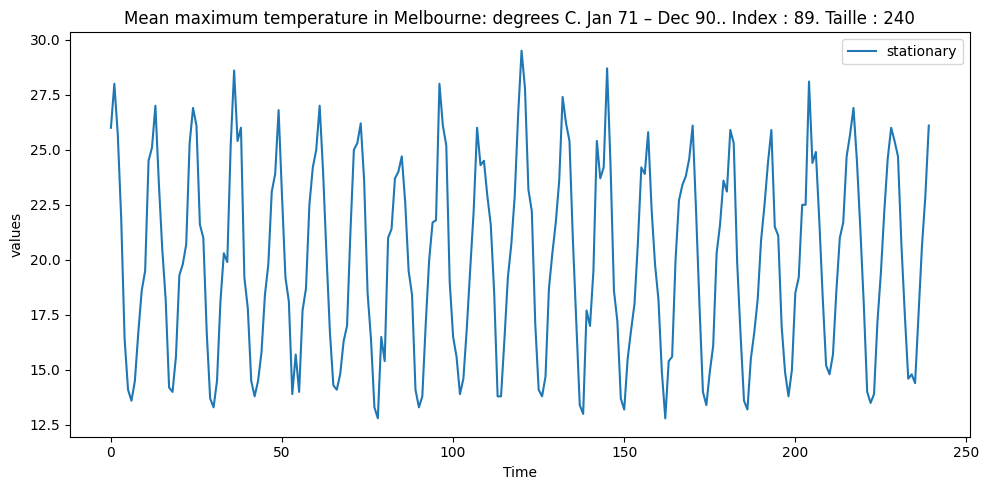

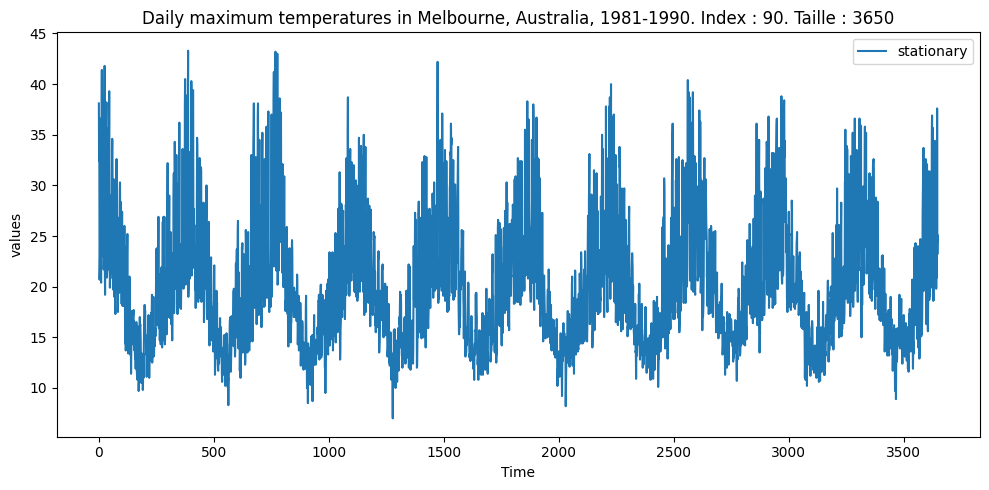

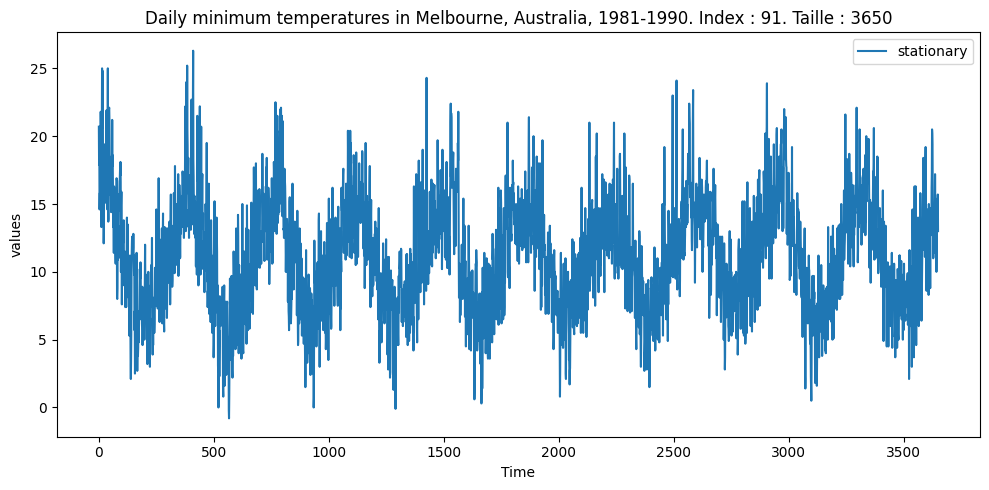

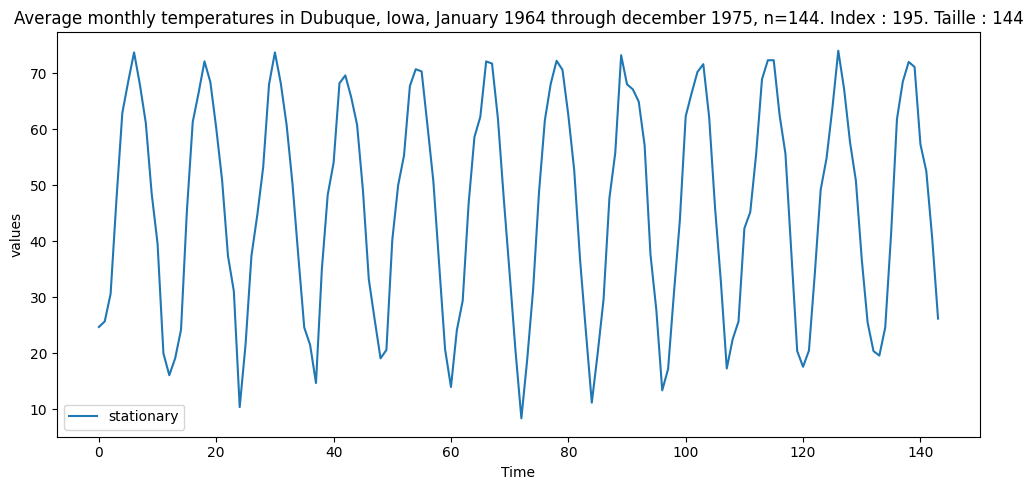

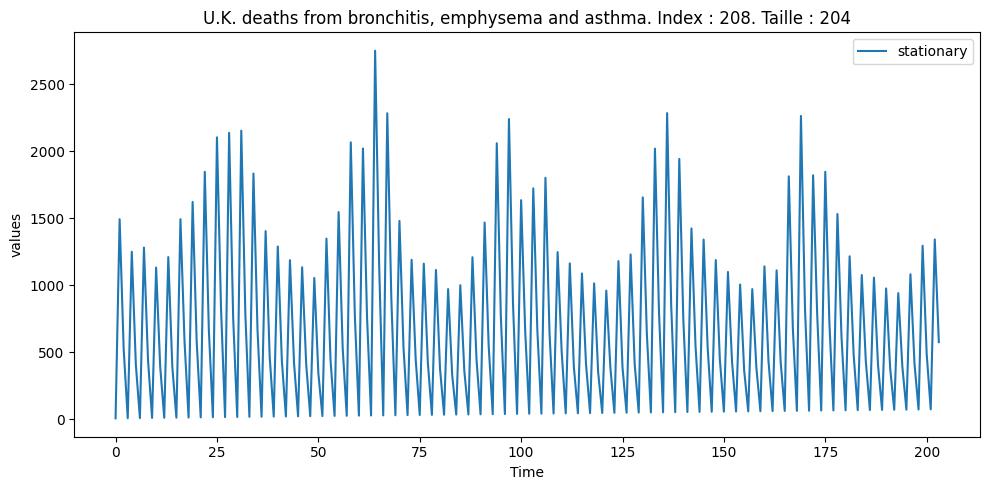

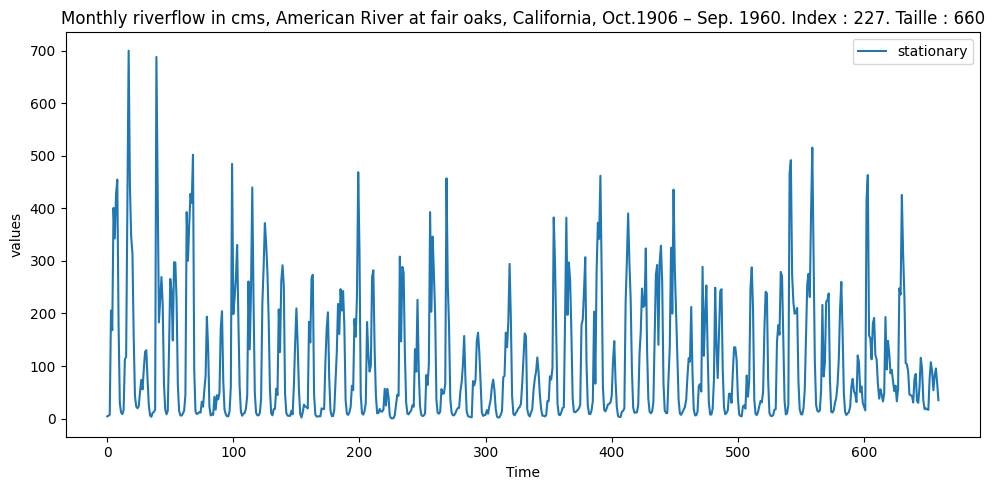

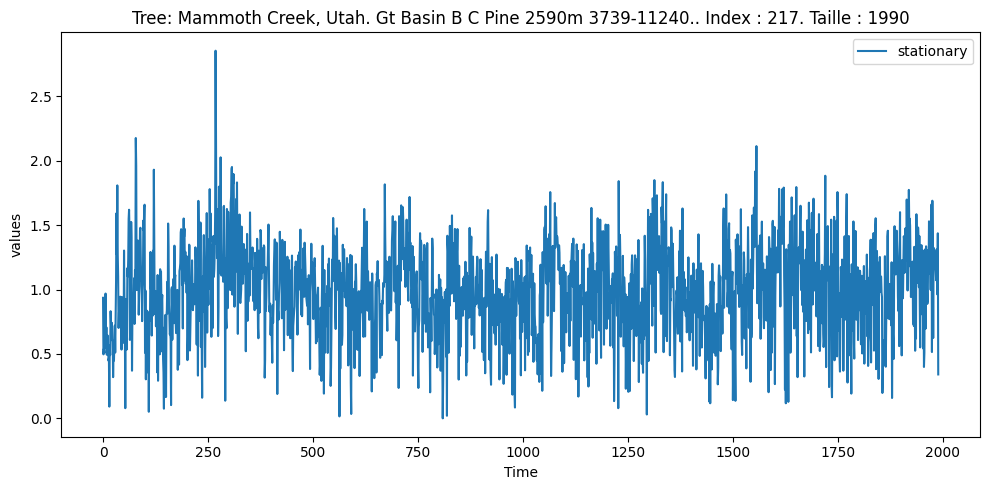

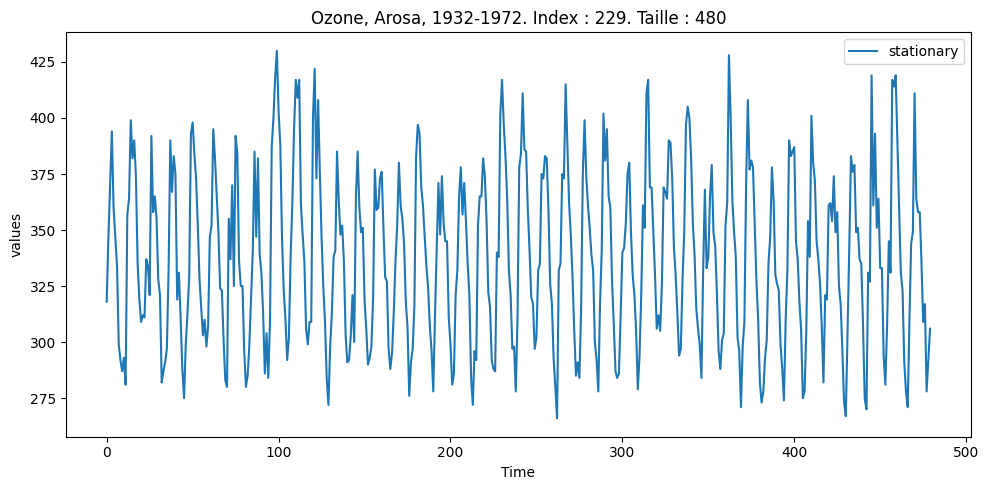

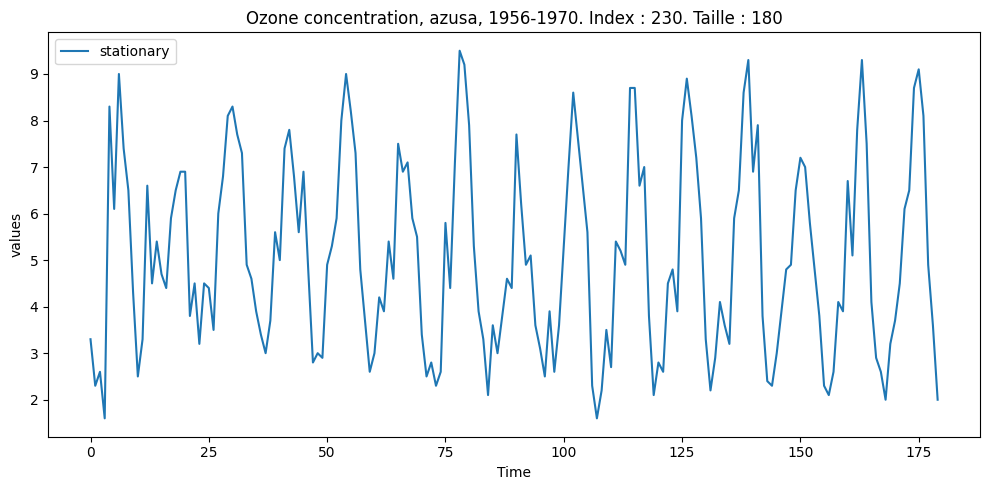

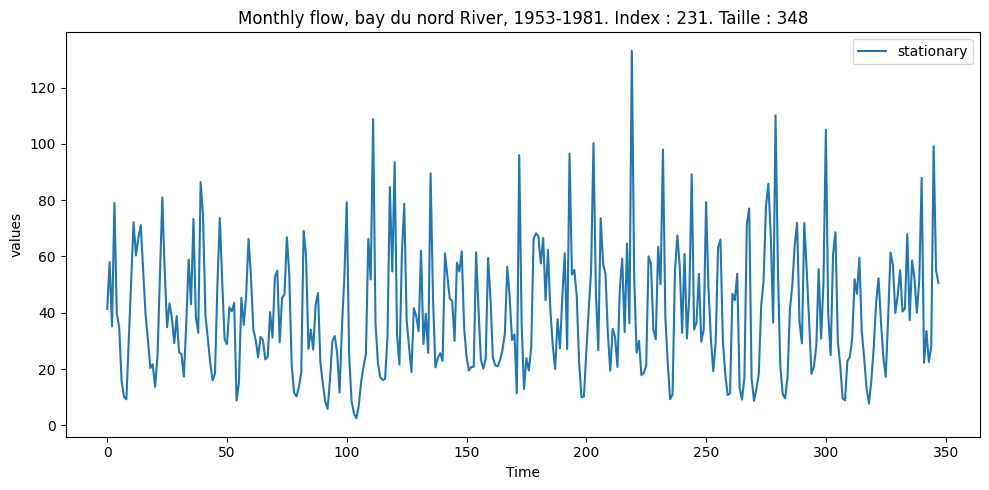

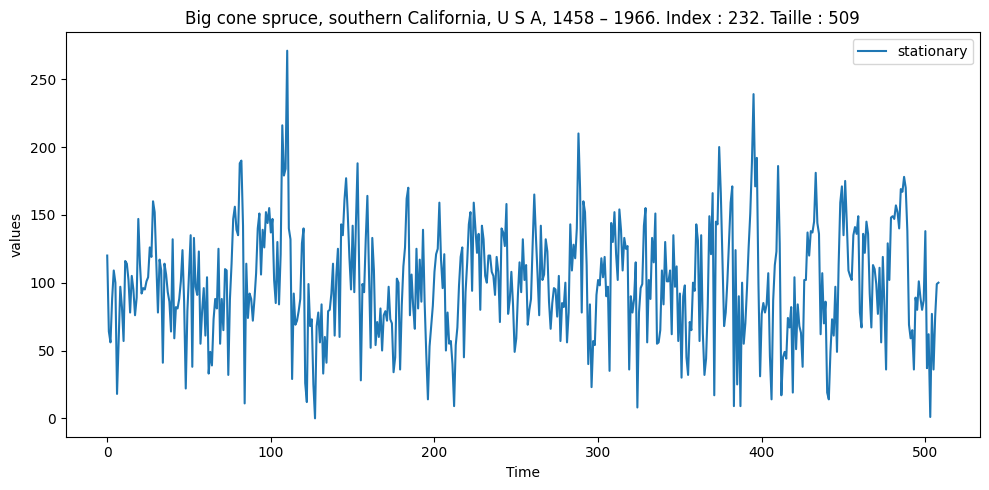

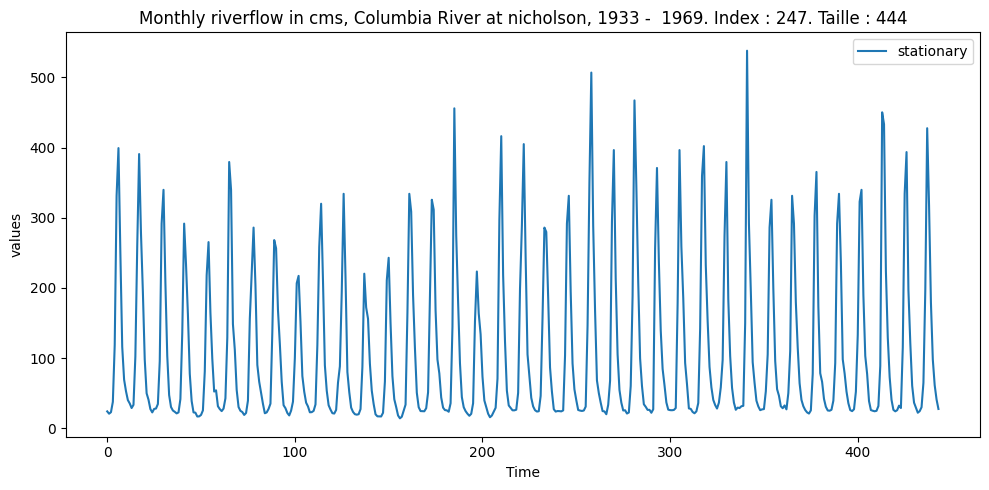

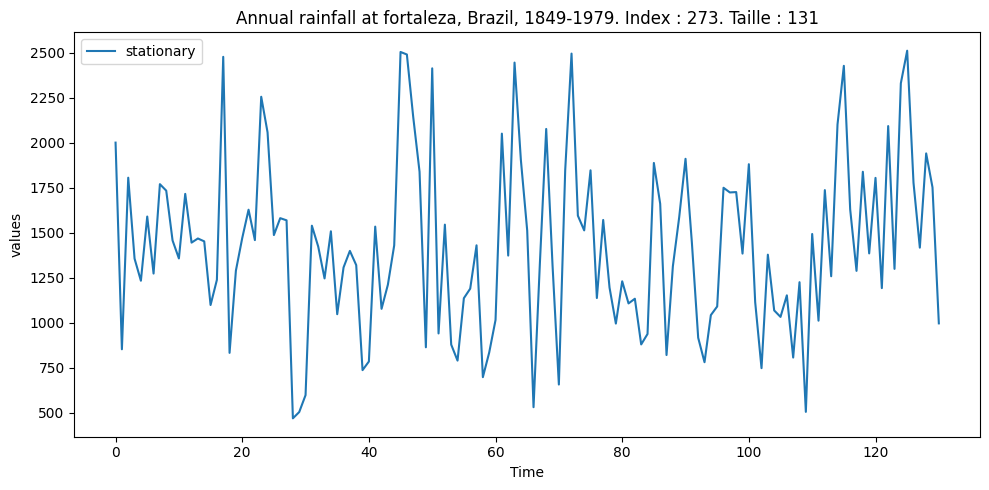

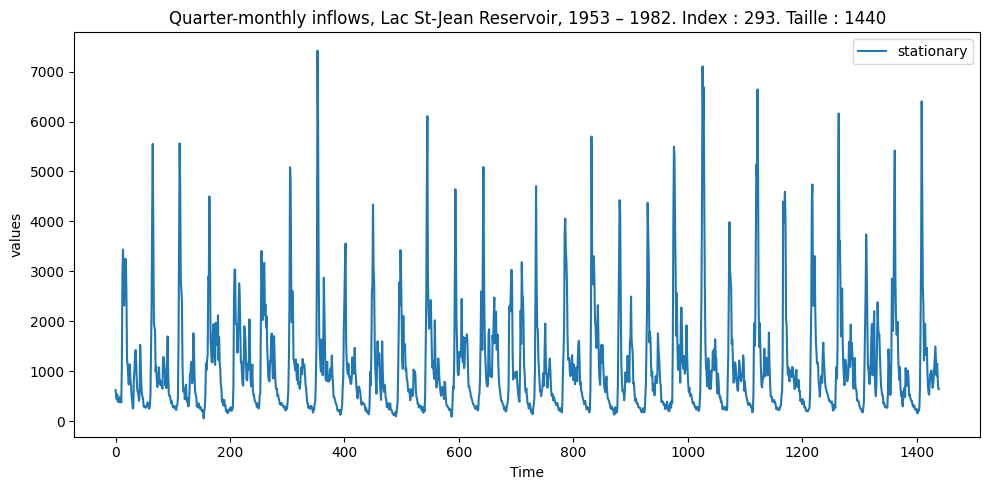

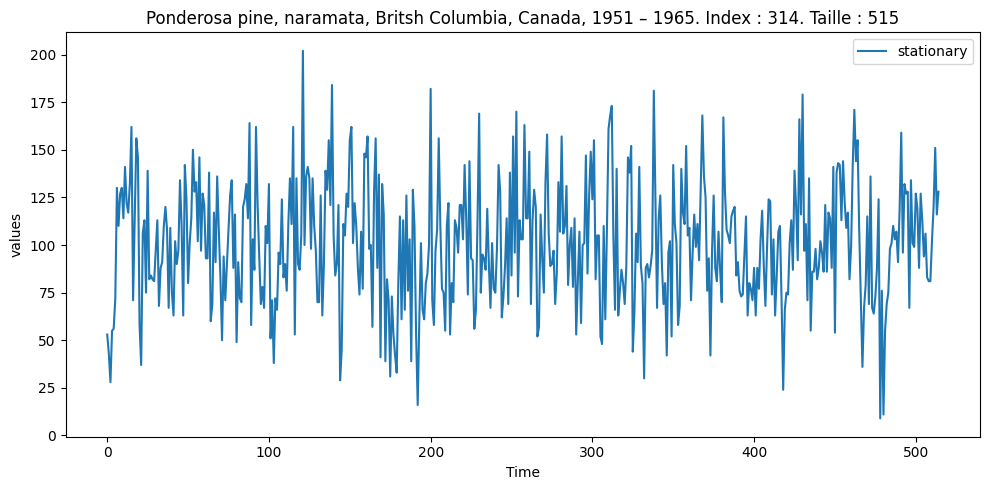

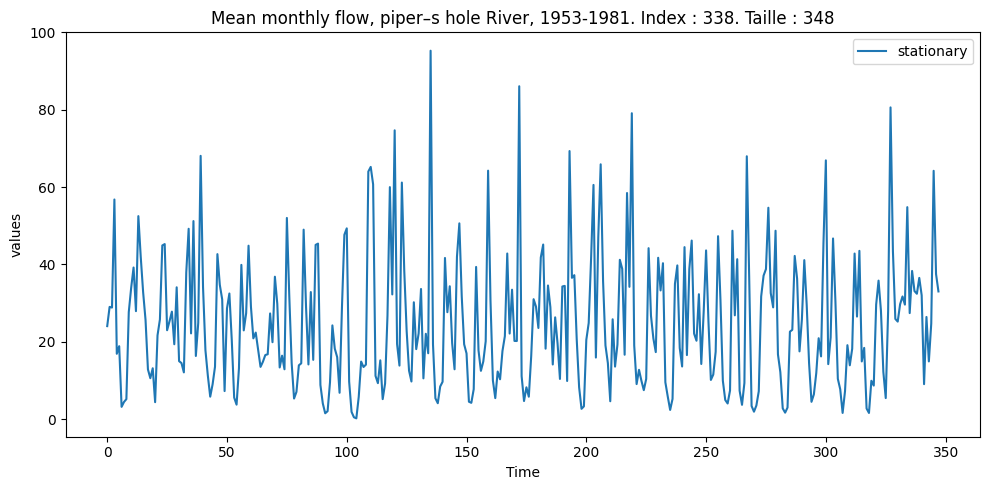

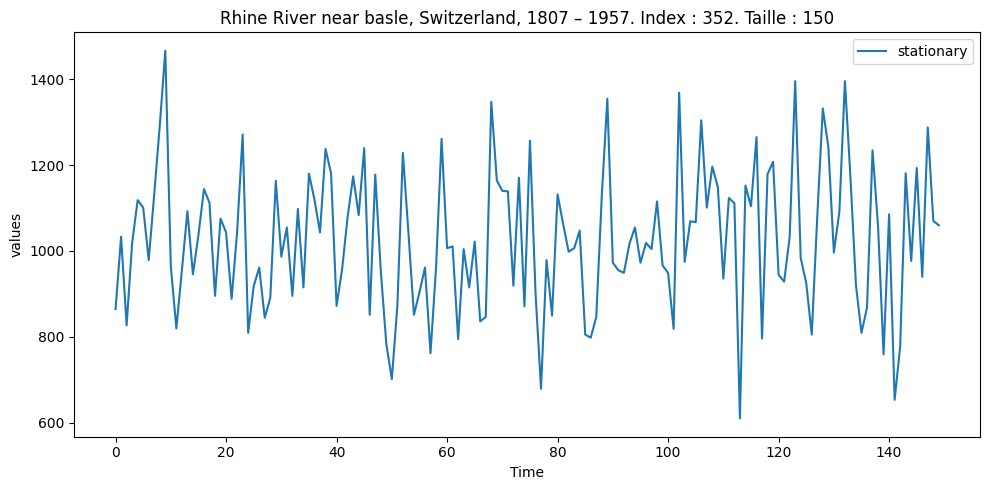

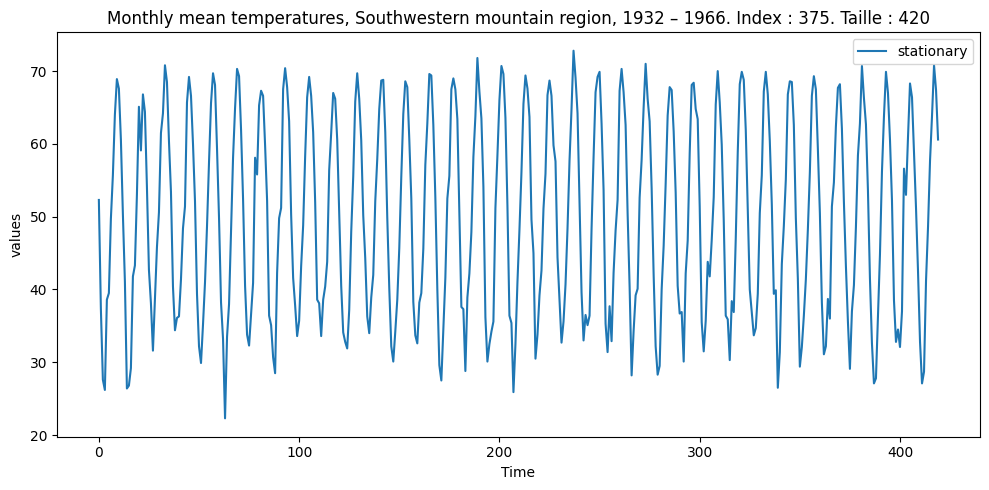

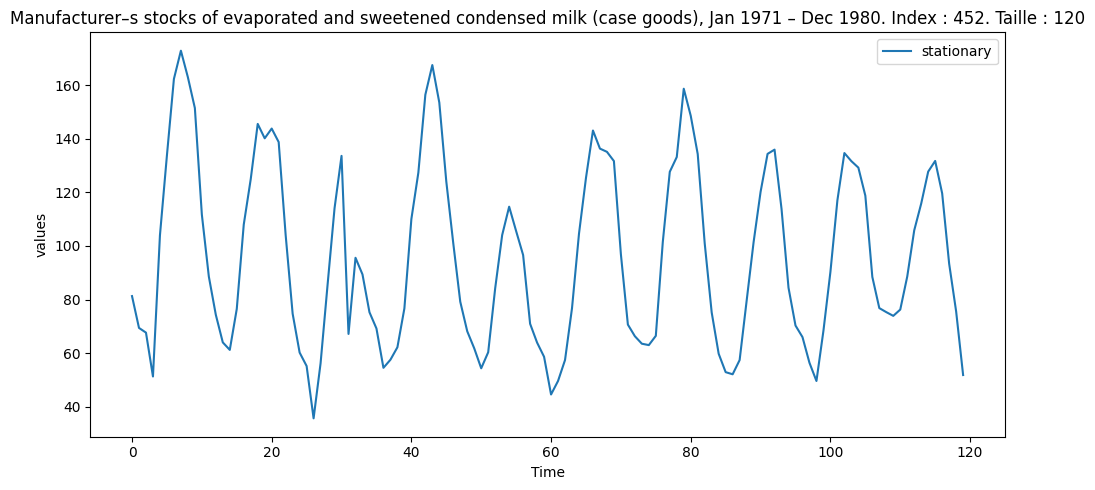

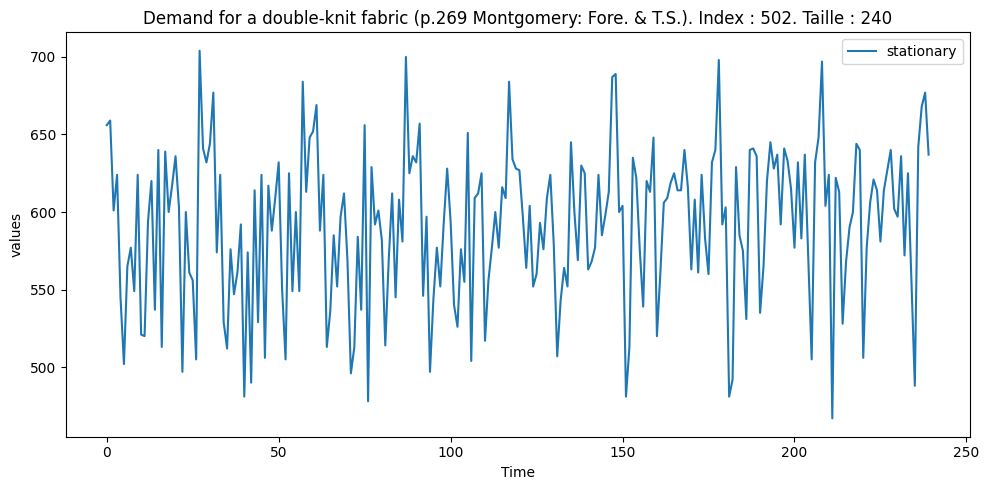

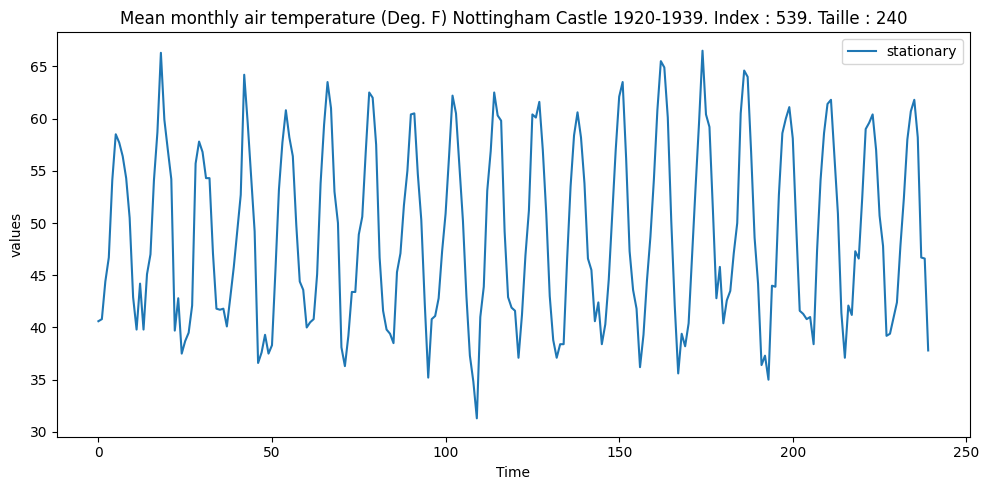

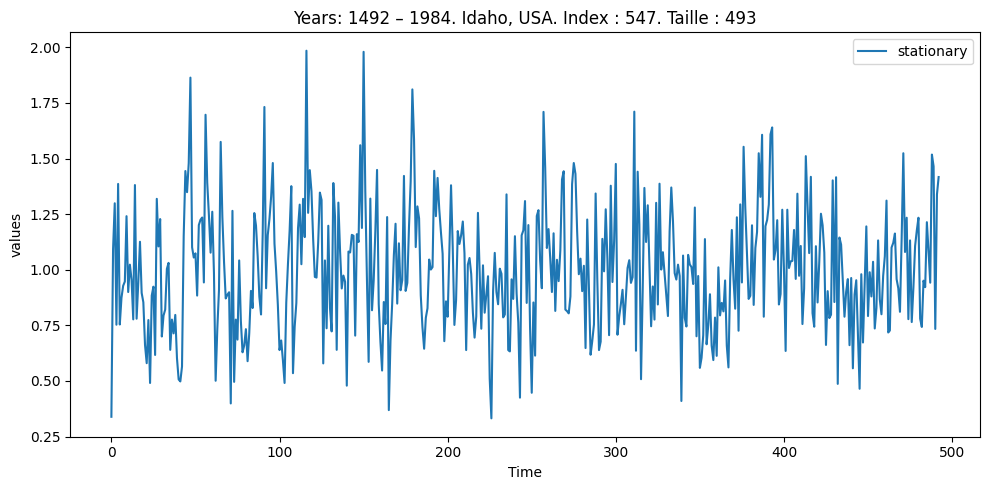

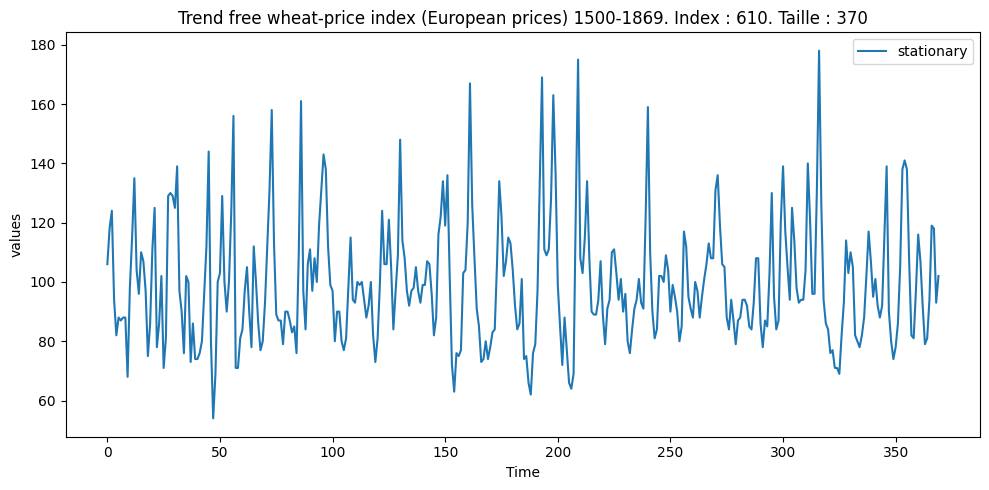

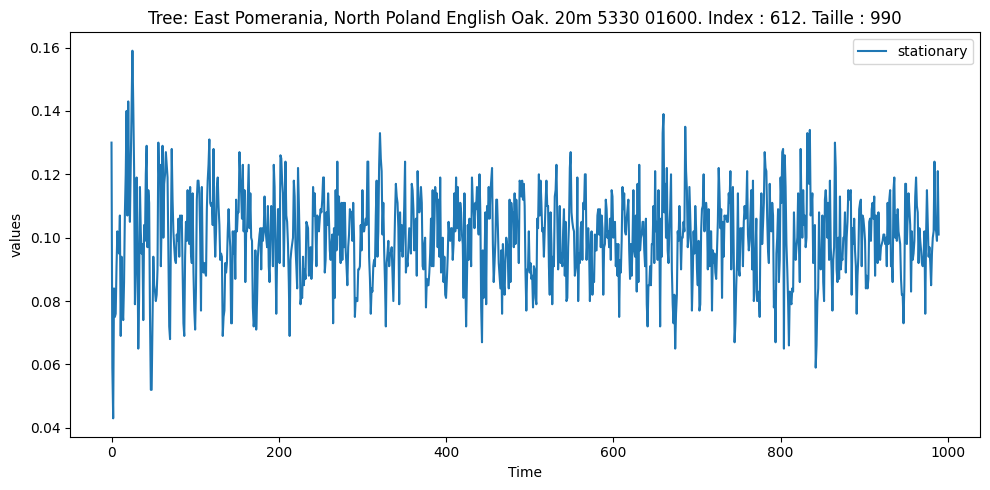

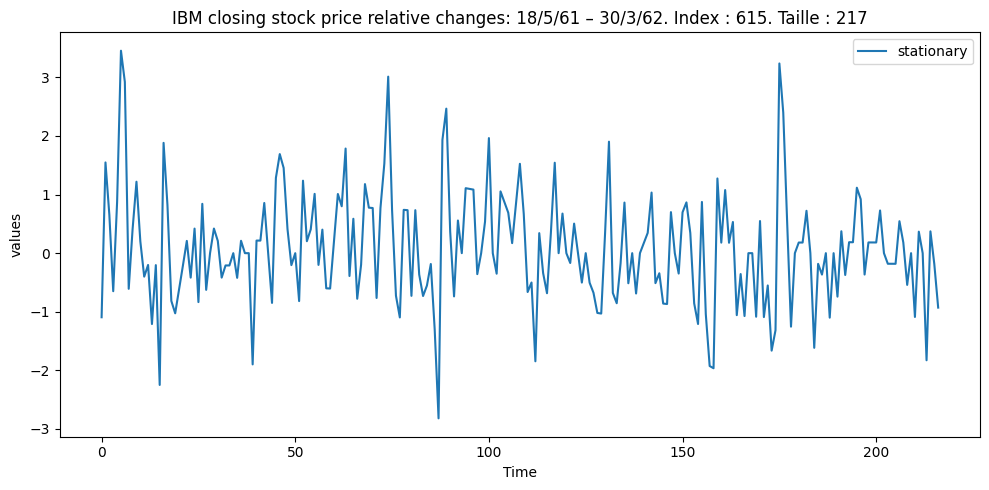

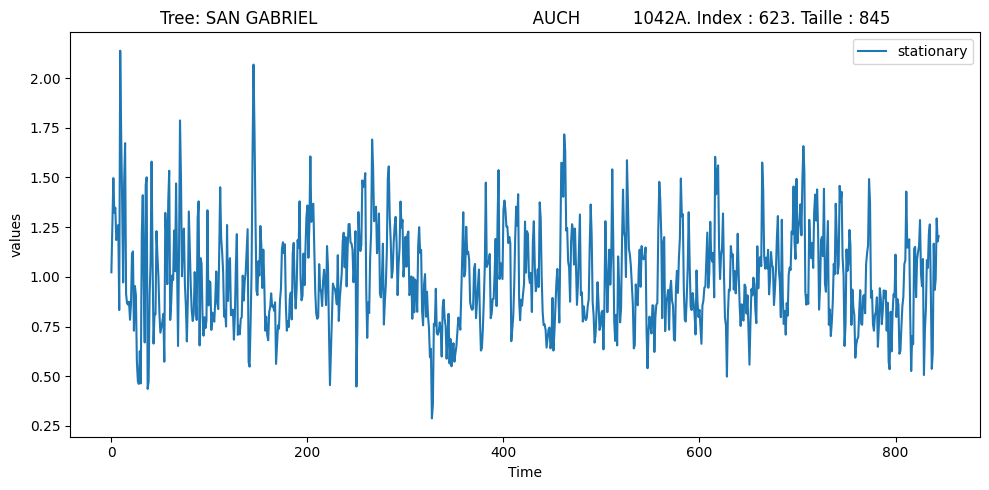

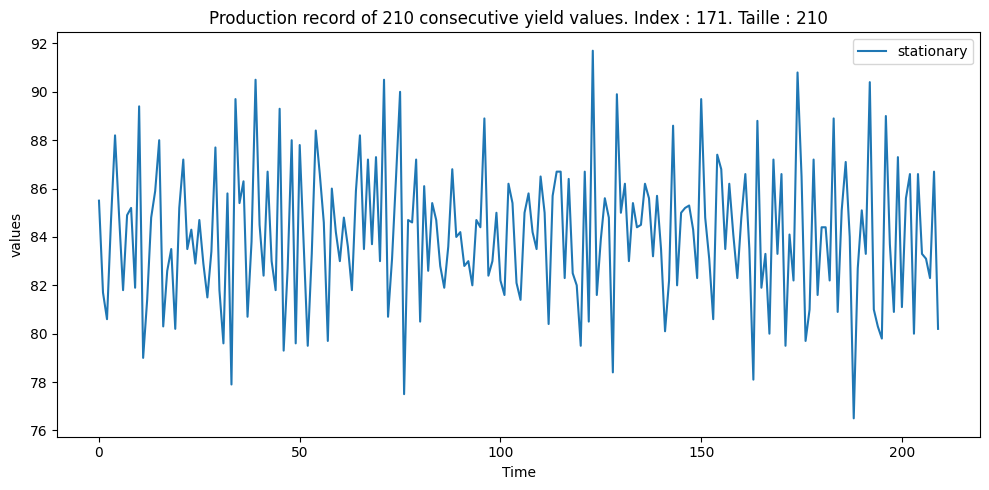

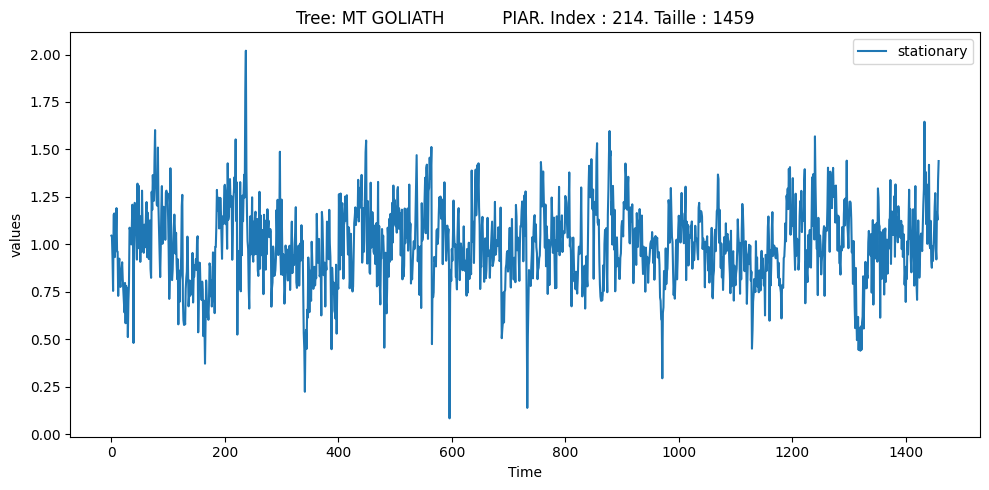

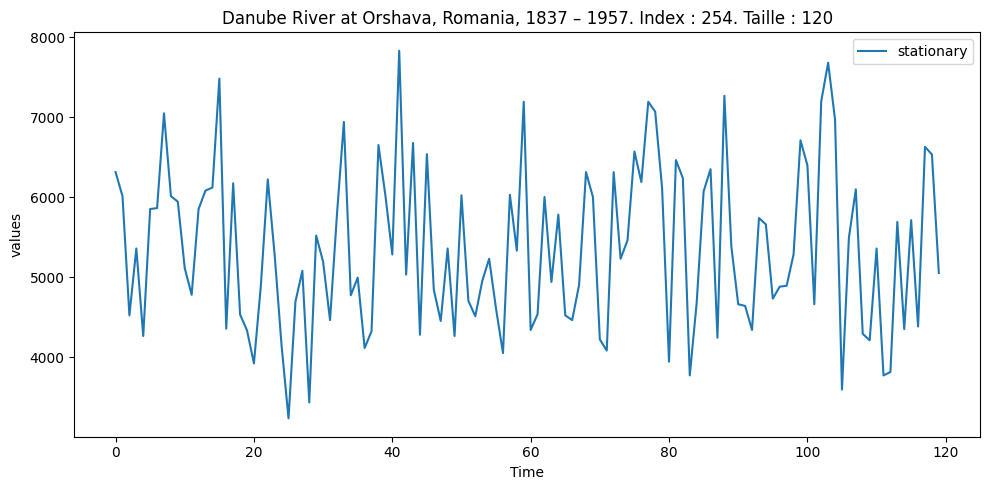

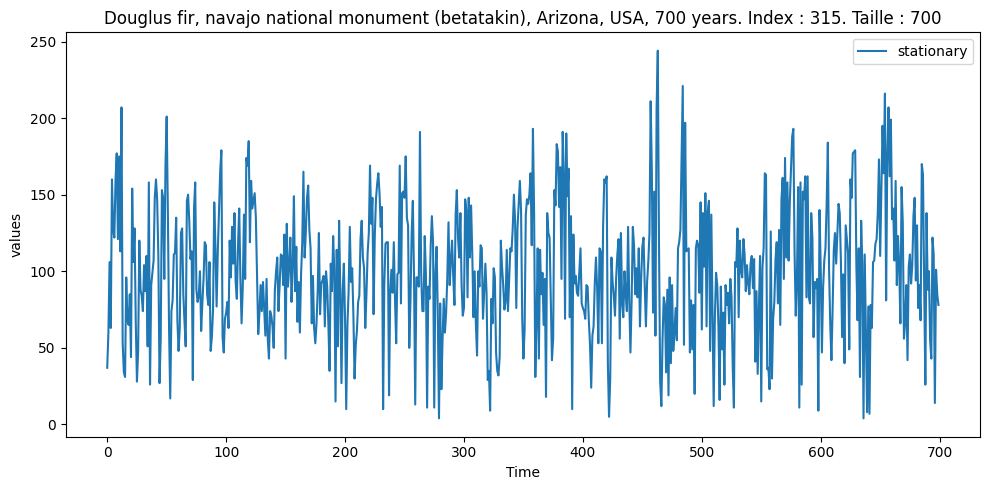

count : 0
count_tot : 30


In [9]:
with open('/content/drive/MyDrive/DATA/tsdl.JSON', 'r', encoding='cp1252') as f:
    data = json.load(f)
liste_statio = []
L_1 = [25,293,304,322,537]  #Stationnaire, avec motif
L_2 = [6,23,27,30,39,75,158,221,257,363]   #Stationaire, sans motif
L_3 = [0,3,8,17,61,98,106,121,122,131,149] #179,186,193,202,203,246,357,382,454,457,463,543,544]  #Non stationaire, avec motif
L_4 = [36,53,57,58,125,224,283,369,404,442] #Non stationnaire, sans motif

L_statio =  [89,90,91,195,208,227,217,229,230,231,232,247,273,293,314,338,352,375,452,502,539,547,610,612,615,623,171,214,254,315]
L_non_statio = [0,3,5,18,17,16,61,95,96,98,99,106,121,122,123,131,132,149,160,193,202,203,246,251,382,390,391,400,483,478]
count = 0
count_tot = 0
for ind in L_statio:
  if data[ind]["type"]=='univariate' and data[ind]["missing_values"]== False:
# Exemple depuis la TSDL
    L =  data[ind]['values']
    if is_stationary_adfuller(L):
      count_tot +=1
      fig, axs = plt.subplots(1, 1, figsize=(10, 5))
      axs.plot(L, label = "stationary")
      axs.set_xlabel('Time')
      axs.set_ylabel('values')
      axs.set_title(f"{data[ind]['description']}. Index : {ind}. Taille : {len(data[ind]['values'])}")
      axs.legend()
      plt.tight_layout()
      plt.show()

    else :
      count_tot+=1
      count +=1
      fig, axs = plt.subplots(1, 1, figsize=(10, 5))
      axs.plot(L, label = "non stationary")
      axs.set_xlabel('Time')
      axs.set_ylabel('values')
      axs.set_title(f"{data[ind]['description']}. Index : {ind}. Taille : {len(data[ind]['values'])}")
      axs.legend()
      plt.tight_layout()
      plt.show()

print("count :",count)
print("count_tot :",count_tot)